# 1. Veri 

### 1.1 Veri Seti Açıklaması

Verisetinde 12330 satır ve 18 sütun bulunmaktadır. Bu sütunların 10'u sayısal değer ile 8'i kategorik değer ile temsile edilmektedir.  Satırlar farklı oturumları (sessions) göstermektedir. Bu oturumların 10.422'si alışverişle sonuçlanmamıştır (negative class), 1.908'i ise alışverişle sonuçlanmıştır (positive class).

Veri setindeki öznitelikler aşağıdaki tabloda verilmiştir: 


| Sütun Adı                 | Açıklama                                                                                                                           |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| Administrative            | Kullanıcının ziyaret ettiği idari (administrative) sayfa sayısıdır.                                                                |
| Administrative_Duration   | İdari sayfalarda geçirilen toplam süredir.                                                                                          |
| Informational             | Kullanıcının ziyaret ettiği bilgilendirici (informational) sayfa sayısıdır.                                                        |
| Informational_Duration    | Bilgilendirici sayfalarda geçirilen toplam süredir.                                                                                 |
| ProductRelated            | Kullanıcının ziyaret ettiği ürünle ilgili (product related) sayfa sayısıdır.                                                       |
| ProductRelated_Duration   | Ürünle ilgili sayfalarda geçirilen toplam süredir.                                                                                  |
| BounceRates               | Bir sayfaya giren ziyaretçilerin herhangi bir ek etkileşim yapmadan siteden ayrılma oranıdır.                                      |
| ExitRates                 | Sitede görüntülenen sayfaların, ilgili sayfada sonlanma oranıdır.                                                                   |
| PageValues                | Sayfanın ortalama değeri; hedef sayfa değeri ve/veya e-ticaret işleminin tamamlanması üzerinden hesaplanan ortalama sayfa değeridir. |
| SpecialDay                | Tarama tarihinin özel günlere/tatillere yakınlığını temsil eder (örn. Anneler Günü, Sevgililer Günü).                              |
| Month                     | Sayfa görüntülemesinin gerçekleştiği ay bilgisini string formatında içerir.                                                         |
| OperatingSystems          | Kullanıcının kullandığı işletim sistemini temsil eden tam sayı değeri.                                                              |
| Browser                   | Kullanıcının kullandığı tarayıcıyı temsil eden tam sayı değeri.                                                                     |
| Region                    | Kullanıcının bulunduğu bölgeyi temsil eden tam sayı değeri.                                                                         |
| TrafficType               | Kullanıcının hangi trafik tipi kategorisine ait olduğunu gösteren tam sayı değeri.                                                  |
| VisitorType               | Ziyaretçinin Yeni, Geri Gelen veya Diğer ziyaretçi olduğunu gösteren string değeri.                                               |
| Weekend                   | Oturumun hafta sonunda olup olmadığını gösteren boolean değeri.                                                                    |
| Revenue                   | Kullanıcının satın alma işlemini tamamlayıp tamamlamadığını gösteren boolean değeri.                                                |




**“Administrative”**, **“Administrative Duration”**, **“Informational”**, **“Informational Duration”**, **“Product Related”** ve **“Product Related Duration”** öznitelikleri, ziyaretçinin oturum süresince gezdiği farklı türdeki sayfaların sayısını ve her bir sayfa kategorisinde harcanan toplam süreyi temsil eder.

Bunlar, kullanıcının ziyaret ettiği sayfaların URL bilgilerinden türetilmiş ve kullanıcı bir eylem gerçekleştirdiğinde gerçek zamanlı olarak güncellenen sayısal özniteliklerdir. Örneğin, bir kullanıcı "Product Related" sayfasını ziyaret ettiğinde, "Product Related" sayısı 1 artar ve "Product Related Duration" sayısı, kullanıcının o sayfada geçirdiği süre kadar arta**“Bounce Rate”** (Hemen Çıkma Oranı), **“Exit Rate”** (Çıkış Oranı) ve **“Page Value”** (Sayfa Değeri) öznitelikleri, e-ticaret sitesindeki her sayfa için Google Analytics tarafından ölçülen metrikleri temsil eder. **Bounce Rate:** Bir web sayfası için bu değerin anlamı, siteye o sayfadan giren ve başka hiçbir sayfaya geçmeden siteden ayrılan ziyaretçilerin yüzdesidir. **Exit Rate:** Belirli bir web sayfası için, sayfa görüntülemelerinin oturumdaki son işlem olma oranıdır. **Page Value:** Bir kullanıcının e-ticaret işlemini tamamlamadan önce ziyaret ettiği web sayfalarının ortalama değerini ifade eder. **“Special Day”** (Özel Gün) özniteliği, oturum tarihinin özel bir güne (örneğin Anneler Günü, Sevgililer Günü vb.) yakınlığını gösterir. Bu tür özel günlere yakın oturumların, alışverişle sonuçlanma olasılığı daha yüksektir. Bu özniteliğin değeri, sipariş tarihi ile teslim tarihi arasındaki süre gibi e-ticaret dinamikleri dikkate alınarak belirlenir. Örneğin, Sevgililer Günü için bu değer 2–12 Şubat tarihleri arasında sıfırdan farklı bir değer alır; bu tarihler öncesinde ve sonrasında ise sıfırdır (başka özel günlere yakın olmadığı sürece). 8 Şubat tarihinde maksimum 1 değerini alır. Ayrıca şu bilgiler de yer almaktadır:

- İşletim Sistemi (Operating System)

- Tarayıcı (Browser)

- Bölge (Region)

- Trafik türü (Traffic Type)

- Ziyaretçi tipi (Visitor Type) → Yeni veya geri dönen ziyaretçi

- Hafta sonu bilgisi (Weekend) → Boolean (True/False) → Boolean (True/False)

- Yılın ayı (Month)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

data = pd.read_csv('data/online_shoppers_intention.csv')
data.shape

(12330, 18)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

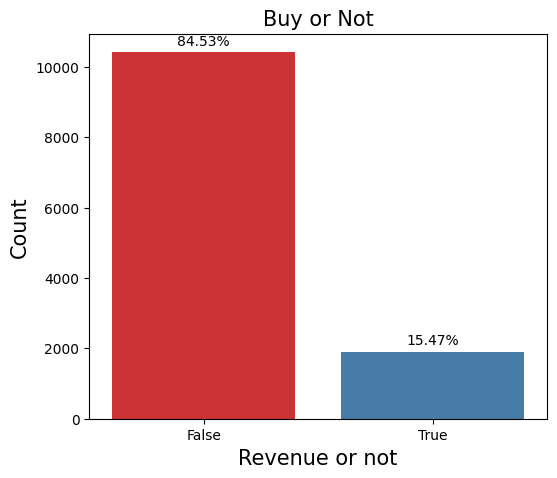

In [25]:
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Revenue', hue='Revenue', data=data, palette='Set1', legend=False)

total = len(data)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.title('Buy or Not', fontsize=15)
plt.xlabel('Revenue or not', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()


## Özniteliklerin istatistiksel analizleri 

### Weekend - Purchase durumu

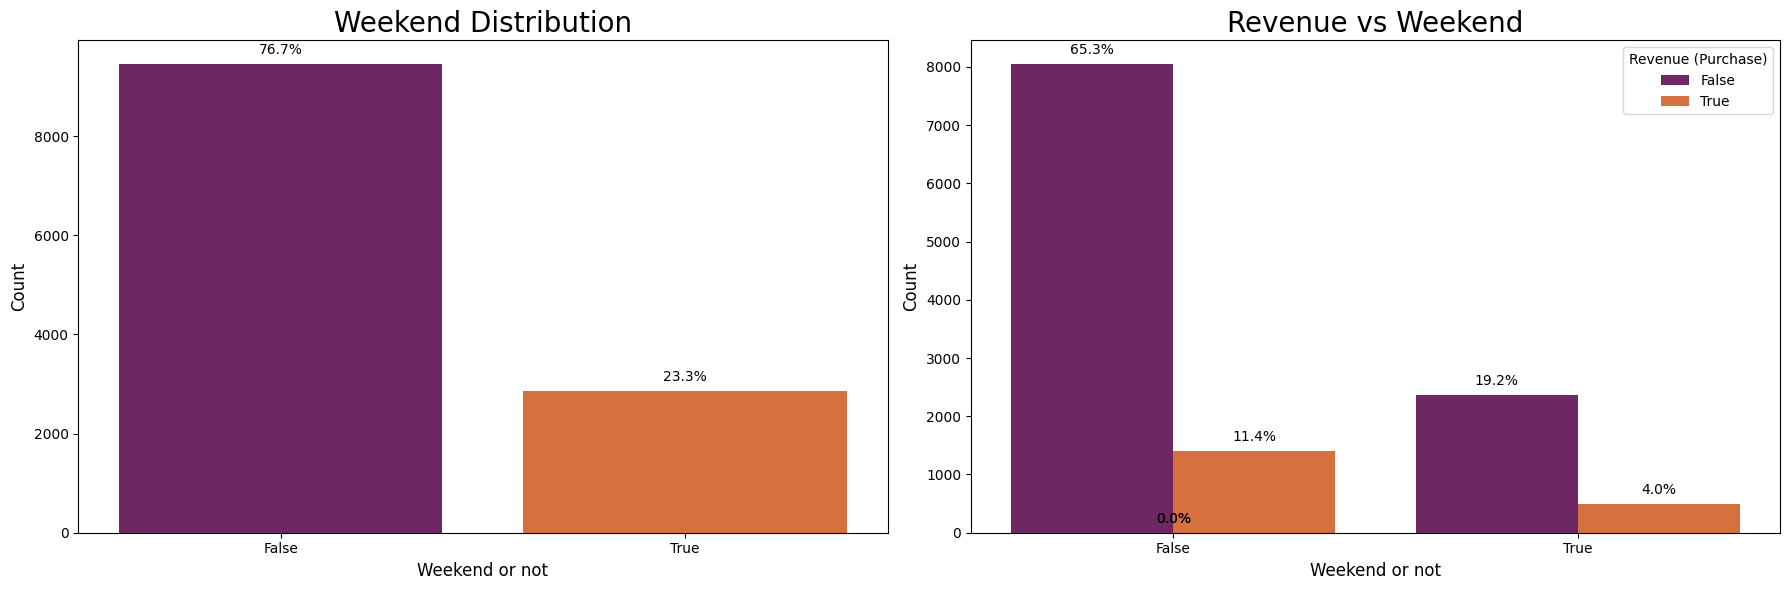

In [31]:
plt.rcParams['figure.figsize'] = (18,6)

fig, axes = plt.subplots(1, 2)

### 1. grafik: Weekend dağılımı
ax1 = sns.countplot(ax=axes[0], x='Weekend', hue='Weekend', data=data, palette='inferno', legend=False)

total = len(data)
for p in ax1.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax1.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0,10), textcoords='offset points')

ax1.set_title('Weekend Distribution', fontsize=20)
ax1.set_xlabel('Weekend or not', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)


### 2. grafik: Weekend x Revenue ilişkisi
ax2 = sns.countplot(ax=axes[1], x='Weekend', hue='Revenue', data=data, palette='inferno')

for p in ax2.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax2.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center',
                xytext=(0,10), textcoords='offset points')

ax2.set_title('Revenue vs Weekend', fontsize=20)
ax2.set_xlabel('Weekend or not', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.legend(title='Revenue (Purchase)')

plt.tight_layout()
plt.show()



Veri dağılımı normal gözükmese de %76.7'sinde hafta içi, %23.3'ü ise hafta sonu kayıtları bulunmaktadır.

### O.S. kullanım durumu

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64


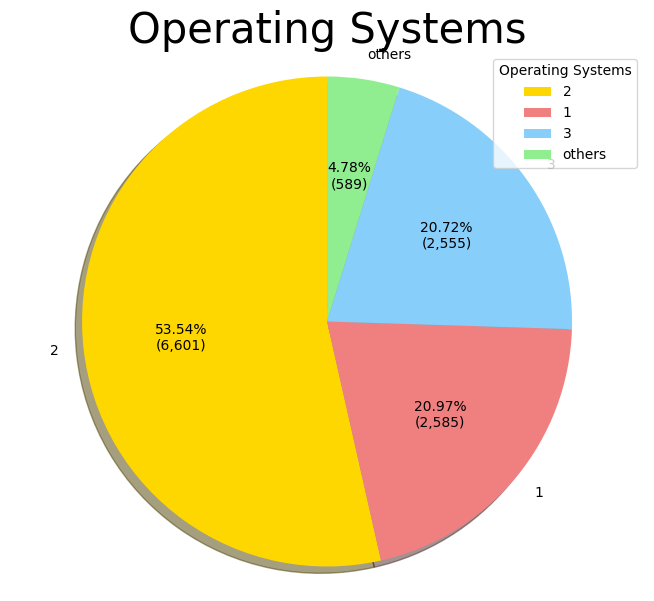

In [32]:
print(data['OperatingSystems'].value_counts())

plt.rcParams['figure.figsize'] = (18, 7)

sizes = [6601, 2585, 2555, 589]   # değerleri "sizes" diye yazmak daha okunabilir
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
labels = ["2", "1", "3", "others"]

plt.subplot(1, 2, 2)

# autopct içinde lambda ile formatlamak daha doğru
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%\n({val:,})'
    return my_autopct

plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    shadow=True, 
    autopct=make_autopct(sizes), 
    startangle=90
)

plt.title('Operating Systems', fontsize=30)
plt.axis('equal')  # pie chart düzgün daire olur
plt.legend(title="Operating Systems")
plt.show()


### Month - Alışveriş durumu

In [41]:
month_counts = data['Month'].value_counts()
month_counts

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

<Figure size 1400x600 with 0 Axes>

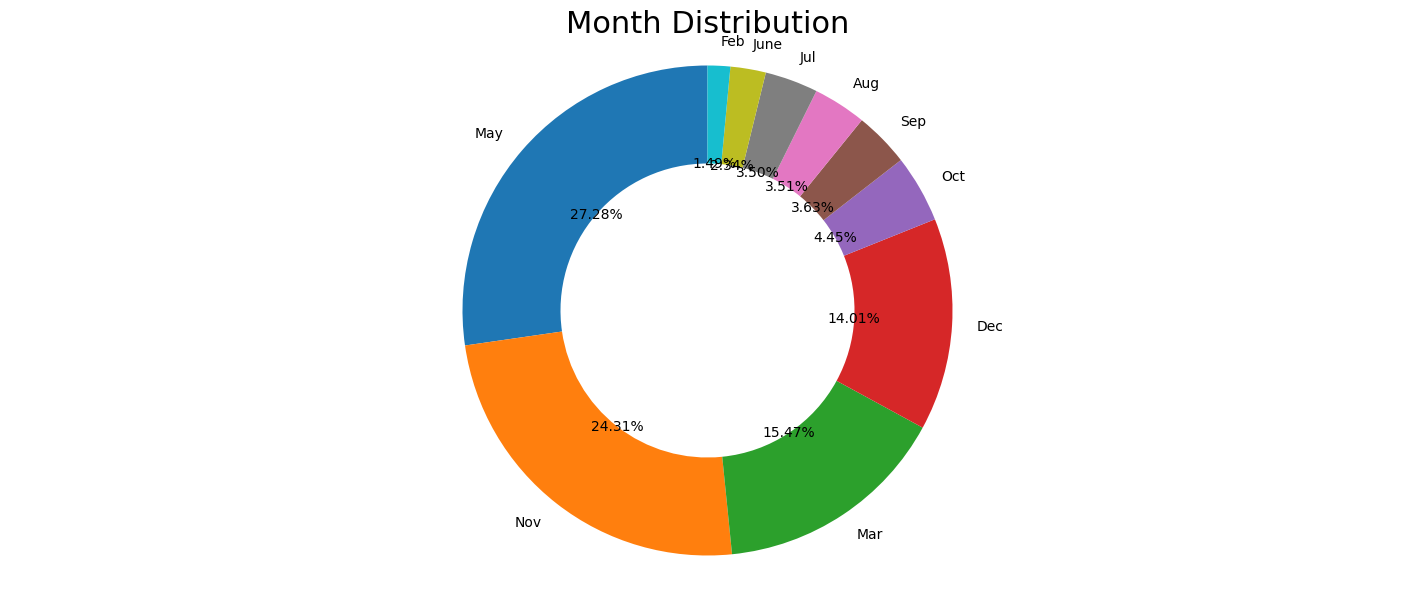

In [45]:
plt.figure(figsize=(14,6))
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    month_counts.values,
    labels=month_counts.index,
    autopct='%.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)   # donut efekti
)

ax.set_title('Month Distribution', fontsize=22)
ax.axis('equal')

plt.show()


### Visitor Type

In [43]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

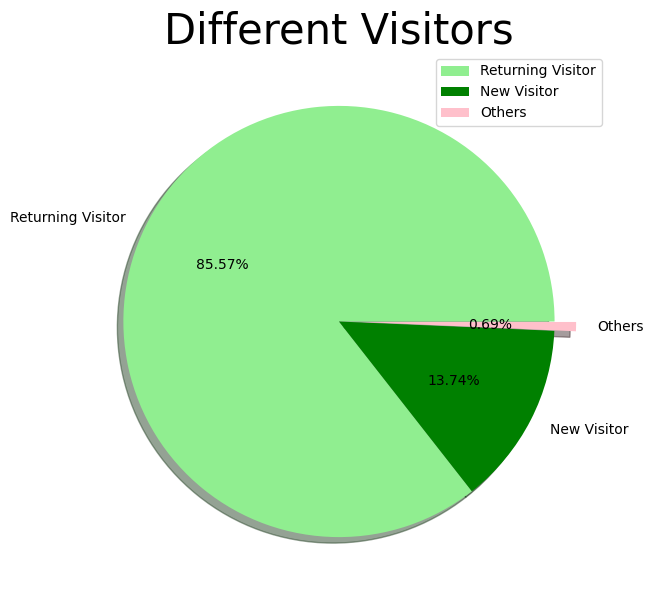

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Müşterilerin %85'i geri dönen ziyaretçilerden oluşmaktadır.

### Traffic Type

20 FARKLI Trafik Türü Kodu bulunmaktadır. Traffic Type 2 en yüksek oranda ziyaretçi çekmektedir. 

In [ ]:
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

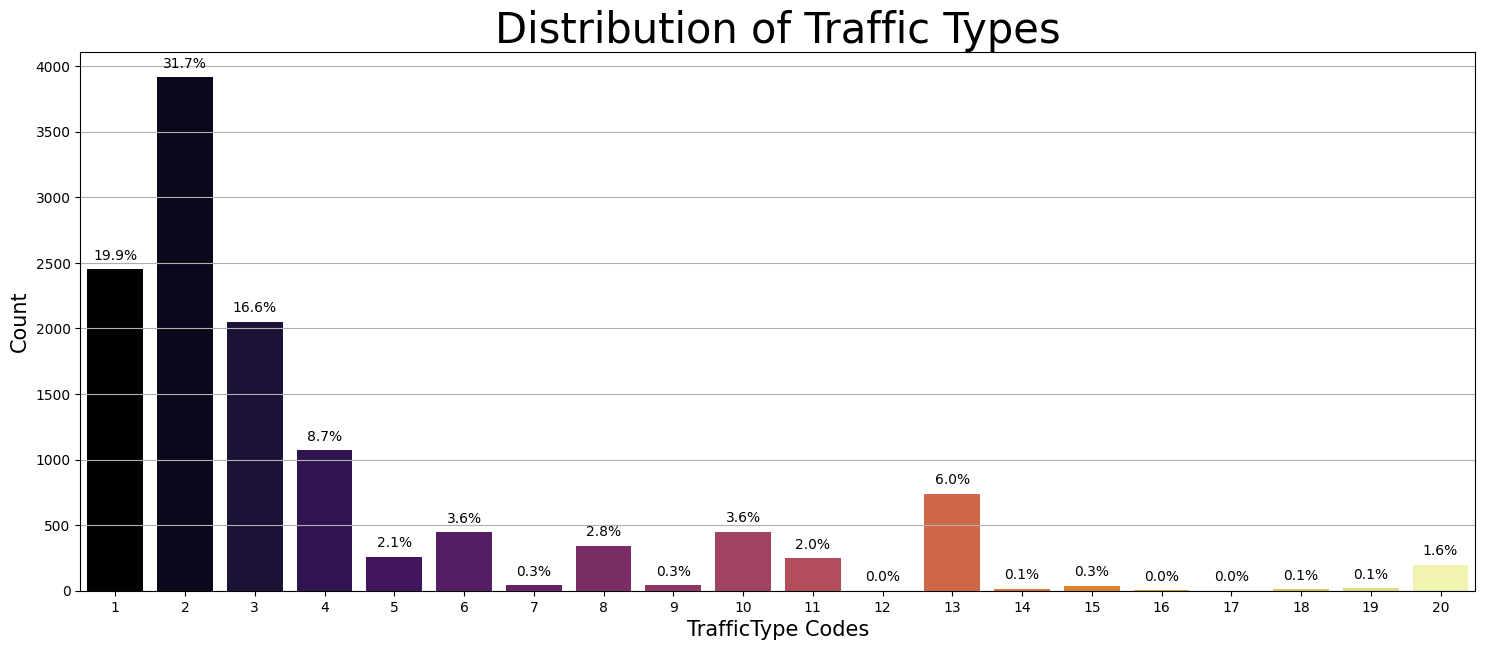

In [47]:
plt.rcParams['figure.figsize'] = (18, 7)

ax = sns.countplot(x='TrafficType', data=data, hue='TrafficType', palette='inferno', legend=False)

total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0,5), textcoords='offset points')

plt.title('Distribution of Traffic Types', fontsize=30)
plt.xlabel('TrafficType Codes', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')
plt.show()


Veri üstel dağılım gösteriyor, dikkat edilmesi gerekebilir. 

### Region

In [50]:
data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

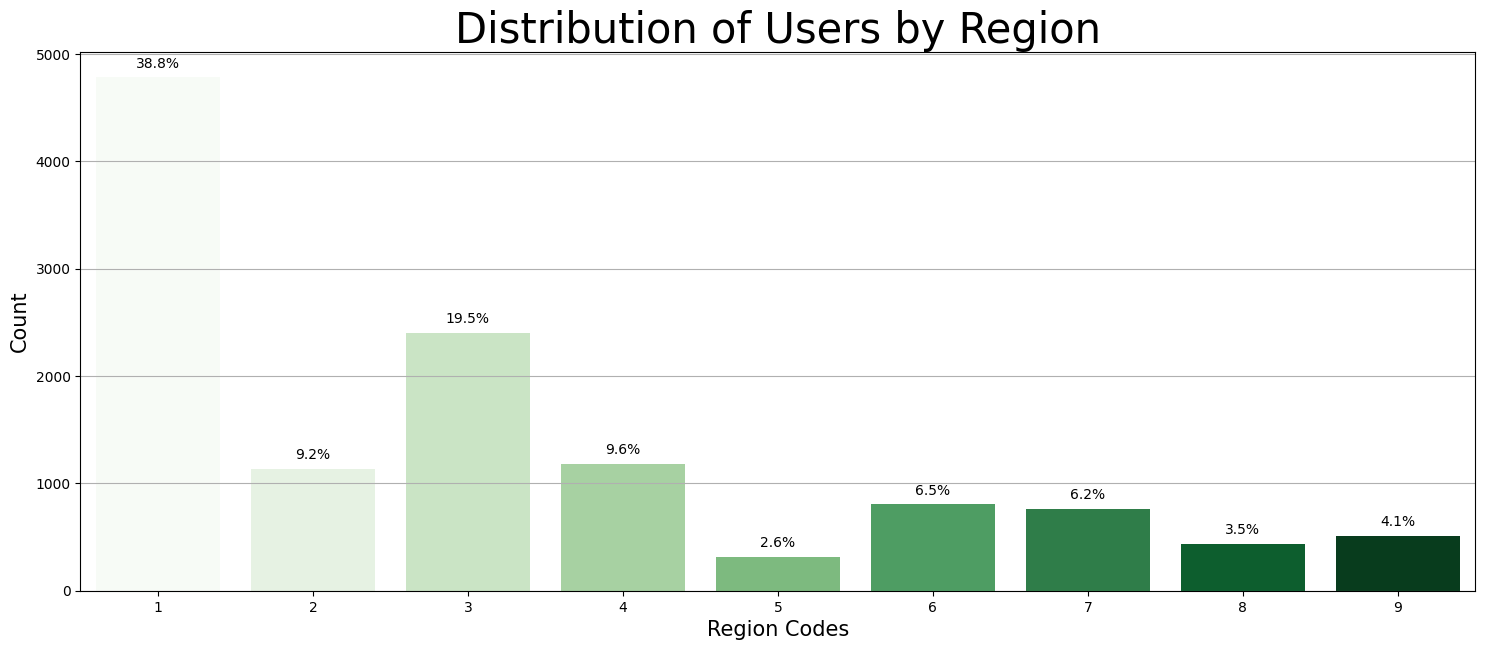

In [49]:
plt.rcParams['figure.figsize'] = (18, 7)

ax = sns.countplot(x='Region', data=data, hue='Region', palette='Greens', legend=False)

total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0,5), textcoords='offset points')

plt.title('Distribution of Users by Region', fontsize=30)
plt.xlabel('Region Codes', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')
plt.show()


Bu bölgesel veriler üstel (exponential) bir dağılım yapısına sahiptir. Bu nedenle bu tür dağılımların analizinde dikkatli olunmalıdır. Burada 9 farklı Bölge Kodu bulunmaktadır.

### SpecialDay 

0.0 ile 1.0 arasında sürekli değerler içeriyor. Özel günlere yakınlık arttıkça alışveriş oranı da artıyor gibi gözüküyor.

In [51]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

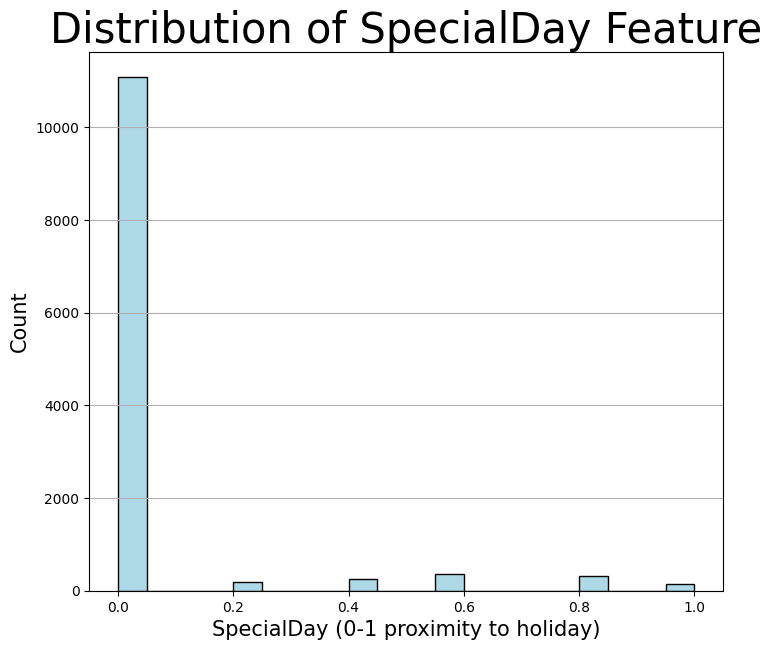

In [53]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['SpecialDay'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of SpecialDay Feature', fontsize=30)
plt.xlabel('SpecialDay (0-1 proximity to holiday)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')
plt.show()


SpecialDay değişkeni 0 ile 1 arasında sürekli değerler almaktadır. Bu değer, kullanıcının siteyi ziyaret ettiği tarihin özel bir güne veya tatile ne kadar yakın olduğunu ifade eder. Verinin dağılımına bakıldığında çoğu kullanımın özel günlerden uzak tarihlerde gerçekleştiği görülmektedir. Bu durum, alışveriş davranışının belirli tatil dönemlerinde değil daha çok sıradan günlerde yoğunlaştığını göstermektedir.

## Bi-Variate Analysis with Visualization
- Administrative duration vs revenue
- Informational duration vs revenue
- product related duration vs revenue
- exit rate vs revenue
- page values vs revenue
- bounce rates vs revenue
- weekend vs Revenue
- Traffic Type vs Revenue
- visitor type vs revenue
- region vs Revenue

### Administrative duration vs Revenue

C:\Users\Yasin\AppData\Local\Temp\ipykernel_13808\336782660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


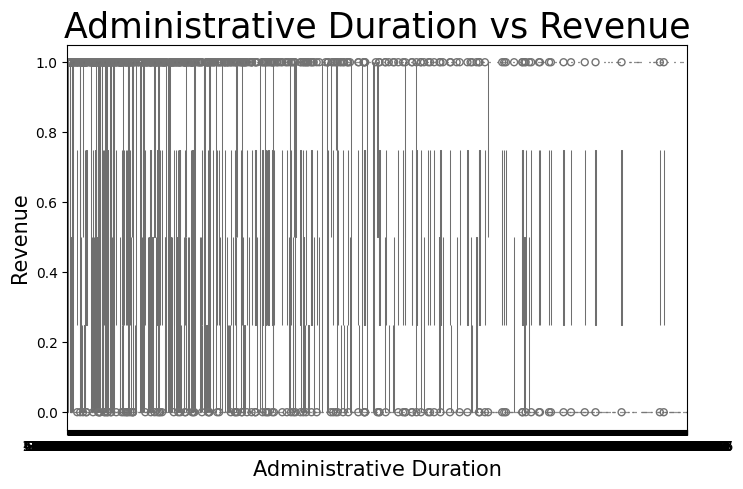

In [55]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(
    x='Administrative_Duration',
    y='Revenue',
    data=data,
    palette='pastel'
)

plt.title('Administrative Duration vs Revenue', fontsize=25)
plt.xlabel('Administrative Duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()


**What is the observation Point here?**
- We see here `Administrative_Duration` is exponentially distributed for both purchased(`True`) or not puchased(`False`). 
- We also see there are so many outliers in not puchased(`False`) according to `Administrative_Duration`.

## Informational duration vs Revenue

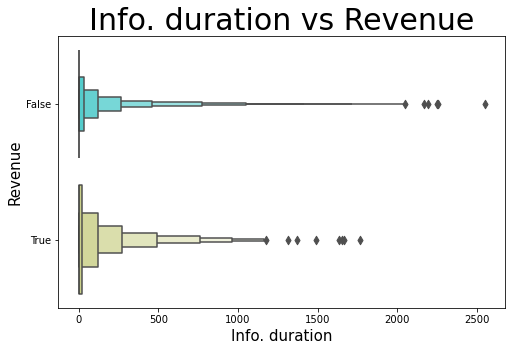

In [ ]:
# boxenplot for Informational duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Informational_Duration'], data['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

**What is the observation Point here?**
- We see here `Informational_Duration` is exponentially distributed for both purchased(`True`) or not puchased(`False`). 
- We also see there are so many outliers in not puchased(`False`) according to `Informational_Duration`.

## Product Related Duration vs Revenue

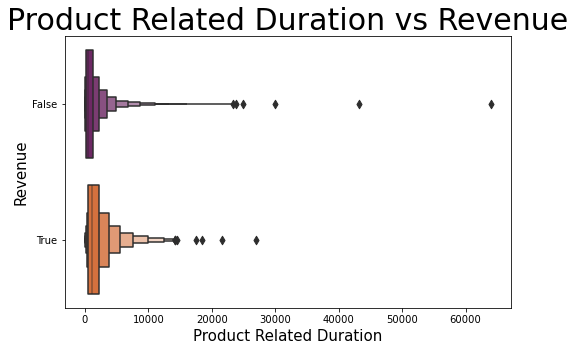

In [ ]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ProductRelated_Duration'], data['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

**What is the observation Point here?**
- We see here `ProductRelatedDuration` is exponentially distributed for both purchased(`True`) or not puchased(`False`). 
- We also see there are so many outliers in not puchased(`False`) according to `ProductRelatedDuration`.

## Exit Rates vs Revenue

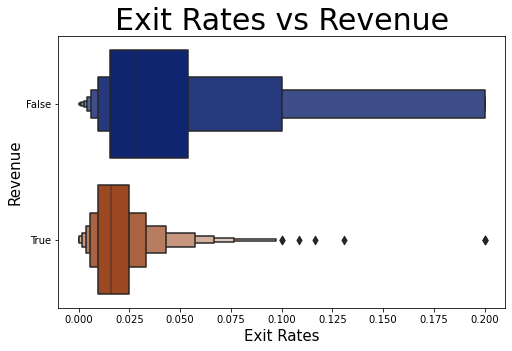

In [ ]:
# boxenplot for exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ExitRates'], data['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

**What is the observation Point here?**
- We see here `ExitRates` is normally(gaussian) distributed for both purchased(`True`) or not puchased(`False`). 
- We also see there are so many outliers in not puchased(`False`) according to `ExitRates`.

## Page Values vs Revenue

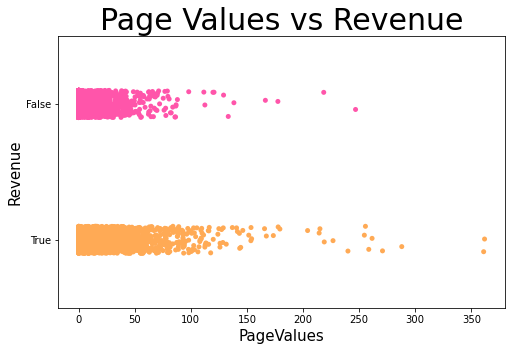

In [ ]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['PageValues'], data['Revenue'], palette = 'spring', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


**What is the observation Point here?**
- We see here `PageValues` is exponentially distributed for both purchased(`True`) or not puchased(`False`). 
- We also see there are so many outliers in puchased(`True`) according to `ExitRates`.
- Most important things is here `PageValues` are highly influenced to purchased(`True`) a product.

## Bounce Rates vs Revenue

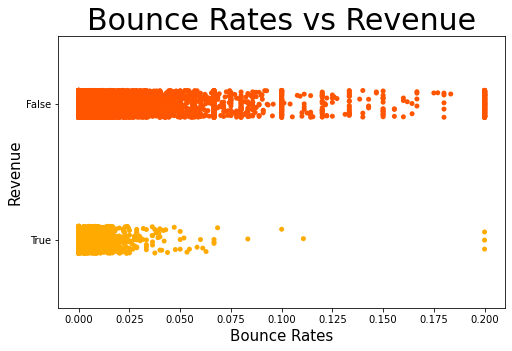

In [ ]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['BounceRates'], data['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


**What is the observation Point here?**
- We see here `BounceRates` is exponentially distributed for both purchased(`True`) or not puchased(`False`). 
- We also see there are so many outliers in not puchased(`False`) according to `ExitRates`.
- `BounceRates` is highly influenced to buy a product or not.

## Weekend vs Revenue

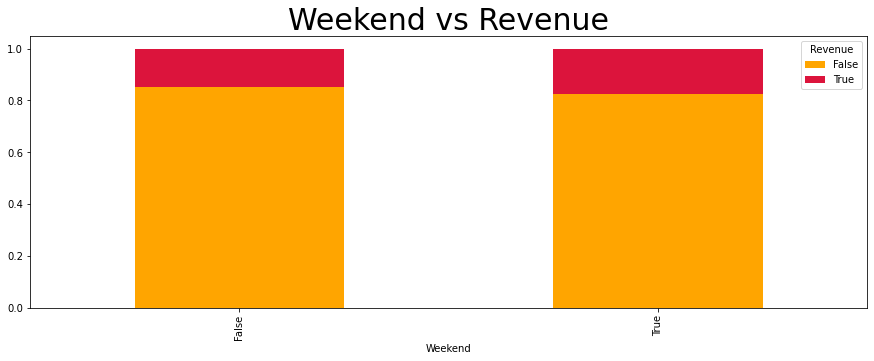

In [ ]:
# bar plot for weekend vs Revenue
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

**What is the observation Point here?**
- We see here `Weekend` is also a boolean column. 
- There is nothing significant to describe here.

## Traffic Type vs Revenue

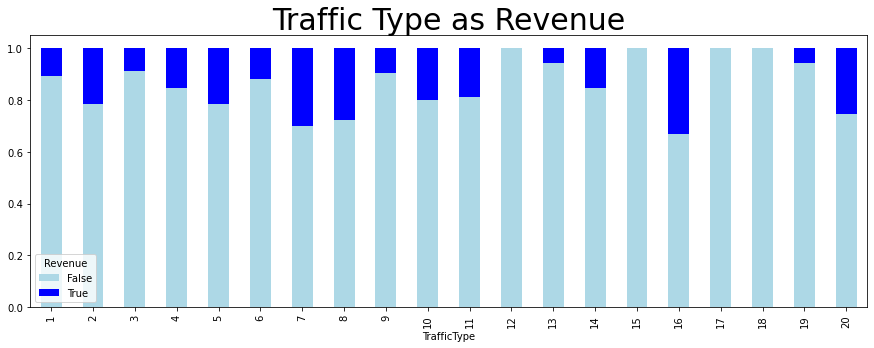

In [ ]:
# bar plot for traffic type vs revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.show()

**What is the observation Point here?**
- We see here `Traffic Type` is a categorical column. 
- In this visualization, every category is different than others. Some of them are highly influenced to buy a product such as (2, 7, 16, 20, etc).

## Visitor type vs revenue

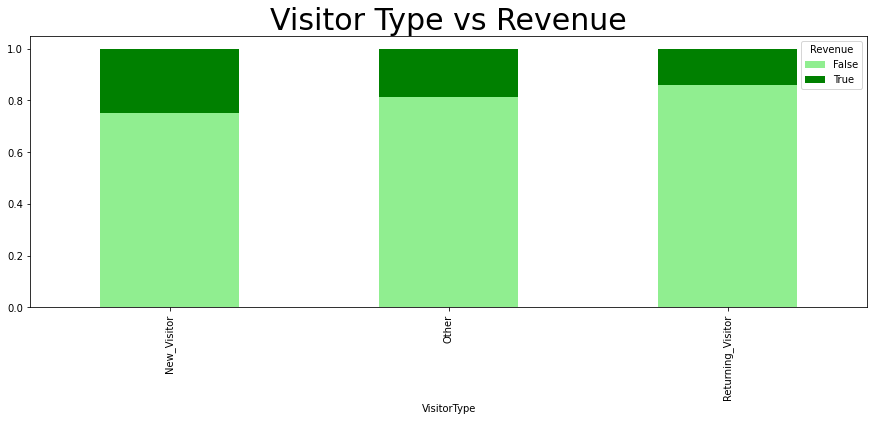

In [ ]:
# bar plot for visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

**What is the observation Point here?**
- We see here `Visitor Type` is also a categorical column. 
- In this visualization, every category is different than others. New_Visitors are highly influenced to buy a product.

## Region vs Revenue

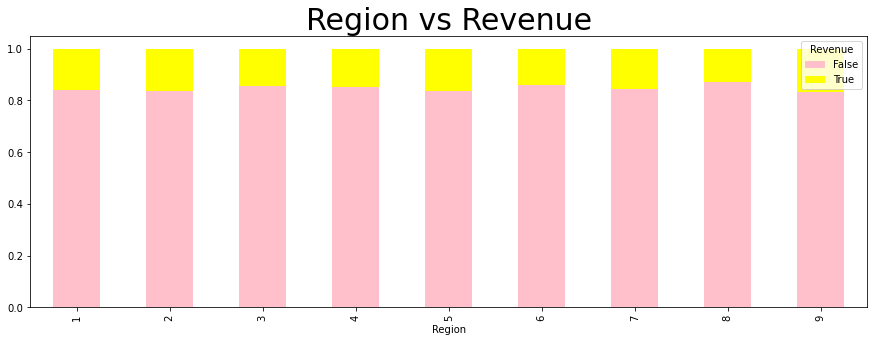

In [ ]:
# bar plot for region vs revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

**What is the observation Point here?**
- We see here `Region` is also a categorical column. 
- In this visualization, every category is almost similar to others.

## Multi-variate Analysis
- month vs pagevalues w.r.t. revenue
- month vs exitrates w.r.t. revenue
- month vs bounceRates w.r.t. Revenue
- visitor type vs BounceRates w.r.t. revenue
- visitor type vs exit rates w.r.t. revenue
- visitor type vs exit rates w.r.t. revenue
- region vs pagevalues w.r.t. revenue
- rigion vs exit rates w.r.t. revenue

### month vs pagevalues w.r.t. revenue

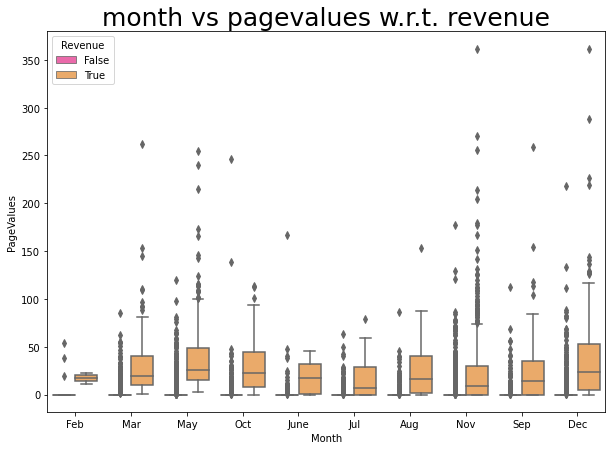

In [ ]:
# boxplot for month vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `Month` vs `PageValues` are normally(Gaussian) distributed when users purchased a product.
- There are lots of outlier also here.

### month vs exitrates w.r.t. revenue

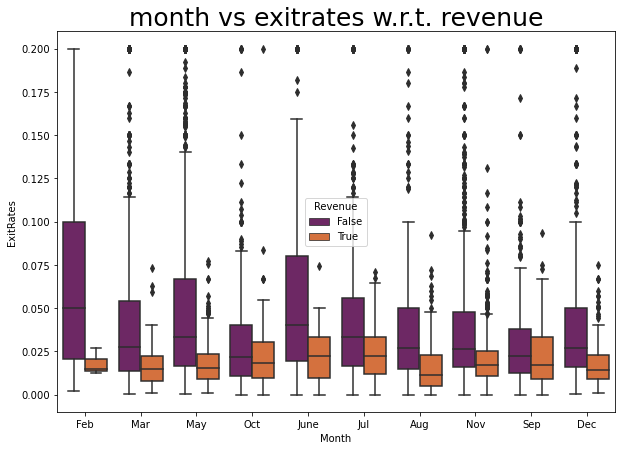

In [ ]:
# boxplot for month vs exitrates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'inferno')
plt.title('month vs exitrates w.r.t. revenue', fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `Month` vs `ExitRates` are normally(Gaussian) distributed for both when users purchased a product or not.
- There are lots of outlier also here.

### month vs bounceRates w.r.t. Revenue

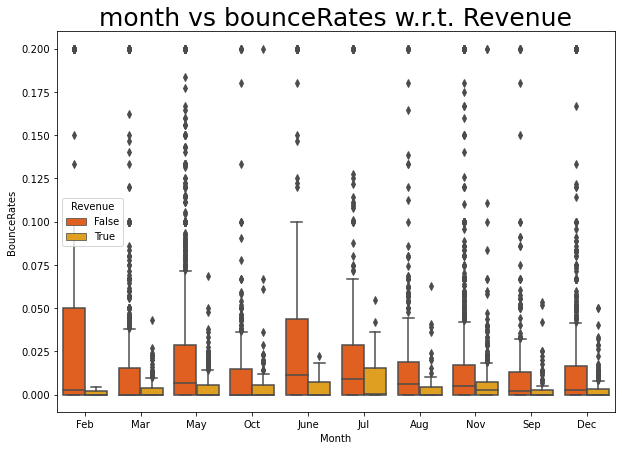

In [ ]:
# boxplot for month vs bounceRates w.r.t. Revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'autumn')
plt.title("month vs bounceRates w.r.t. Revenue", fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `Month` vs `BounceRates` are normally(Gaussian) distributed when users purchased a product for some `Month` but some them are exponentially distributed.
- There are lots of outlier also here.

## VisitorType vs BounceRates w.r.t. revenue

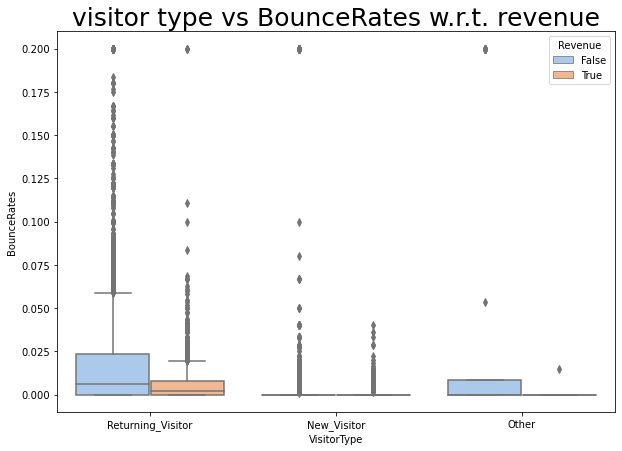

In [ ]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `VisitorType` vs `BounceRates` are normally(Gaussian) distributed when Returning_users purchased a product but New_users and others are exponentially distributed.
- There are lots of outlier also here.

## visitor type vs exit rates w.r.t. revenue

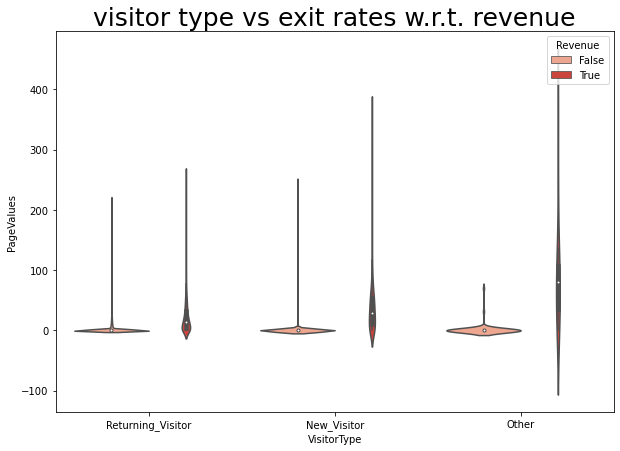

In [ ]:
# violin plot for visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'Reds')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `VisitorType` vs `PageValues` are exponentially distributed when users purchased a product or not.
- There are lots of outlier also here.

## visitor type vs exit rates w.r.t. revenue

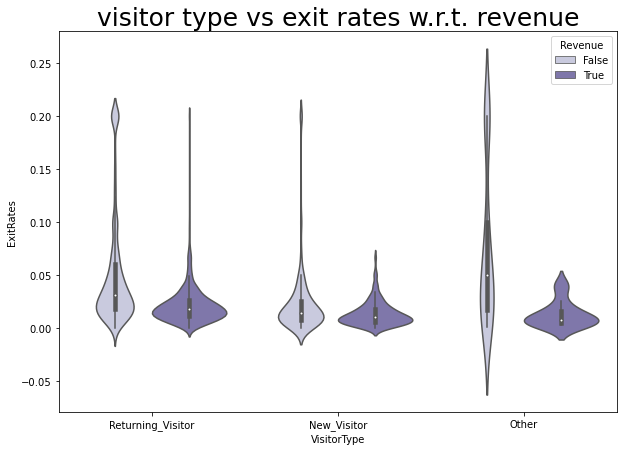

In [ ]:
# violin plot for visitor type vs exit rates wrt revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `VisitorType` vs `PageValues` are exponentially distributed when users purchased a product or not.
- There are lots of outlier for Returning_Visitors.

## region vs pagevalues w.r.t. revenue

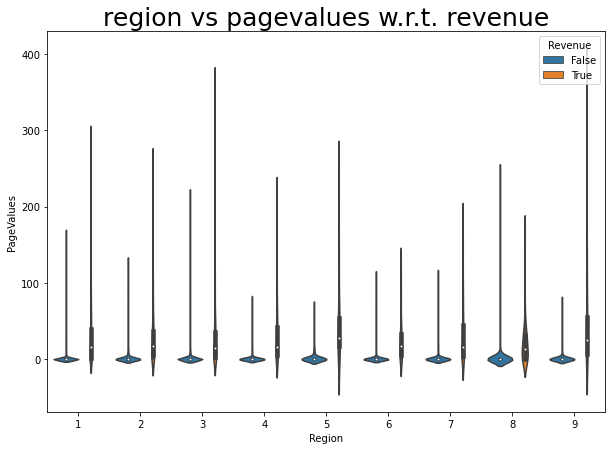

In [ ]:
# violin plot for region vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data ['Region'], y = data['PageValues'], hue = data['Revenue'])
plt.title('region vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()


**What is the observation Point here?**
- We see here `Region` vs `PageValues` are exponentially distributed when users purchased a product or not.
- There are lots of outlier also here.

## rigion vs exit rates w.r.t revenue

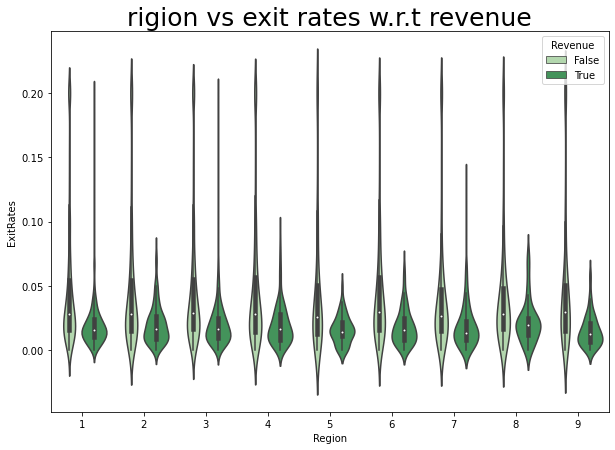

In [ ]:
# violin plot for rigion vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Greens')
plt.title("rigion vs exit rates w.r.t revenue", fontsize = 25)
plt.show()

**What is the observation Point here?**
- We see here `VisitorType` vs `PageValues` are normally(Gaussian) distributed when users purchased a product or not.
- There are lots of outlier also here.

### Summary table of multivariate Feature Analysis

In [ ]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium'] 
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary

,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,rigion vs exit rates,Revenue,Gaussian,High,High,High,Medium


## Statistical Tests
- categorical column vs target column
- Numerical column vs target column

### categorical column vs target column

In [ ]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

A chi-squared test, also written as χ² test, is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. 

#### chi2_contingency
Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence; see `scipy.stats.contingency.expected_freq`. The number of degrees of freedom is (expressed using numpy functions and attributes):

dof = observed.size - sum(observed.shape) + observed.ndim - 1

In [ ]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(data[n], data['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant
        

In [ ]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


### Numerical Column vs Target

In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

#### Shapiro-Wilk test
The null hypothesis for the Shapiro-Wilk test is that `a variable is normally distributed in some population.`
A different way to say the same is that a variable’s values are a simple random sample from a normal distribution. As a rule of thumb, we
reject the null hypothesis if `p < 0.05`.

#### MannWhitneyu
Compute the Mann-Whitney rank test on samples x and y.
### Mann-Whitney rank test
In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

#### levene (scipy.stats)
Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

### Levene's test
In statistics, Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups. Some common statistical procedures assume that variances of the populations from which different samples are drawn are equal. Levene's test assesses this assumption. 

In [ ]:
from scipy.stats import levene

# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = data[n][data['Revenue'] == False]
    g2 = data[n][data['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant
        

In [ ]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


## Outliers

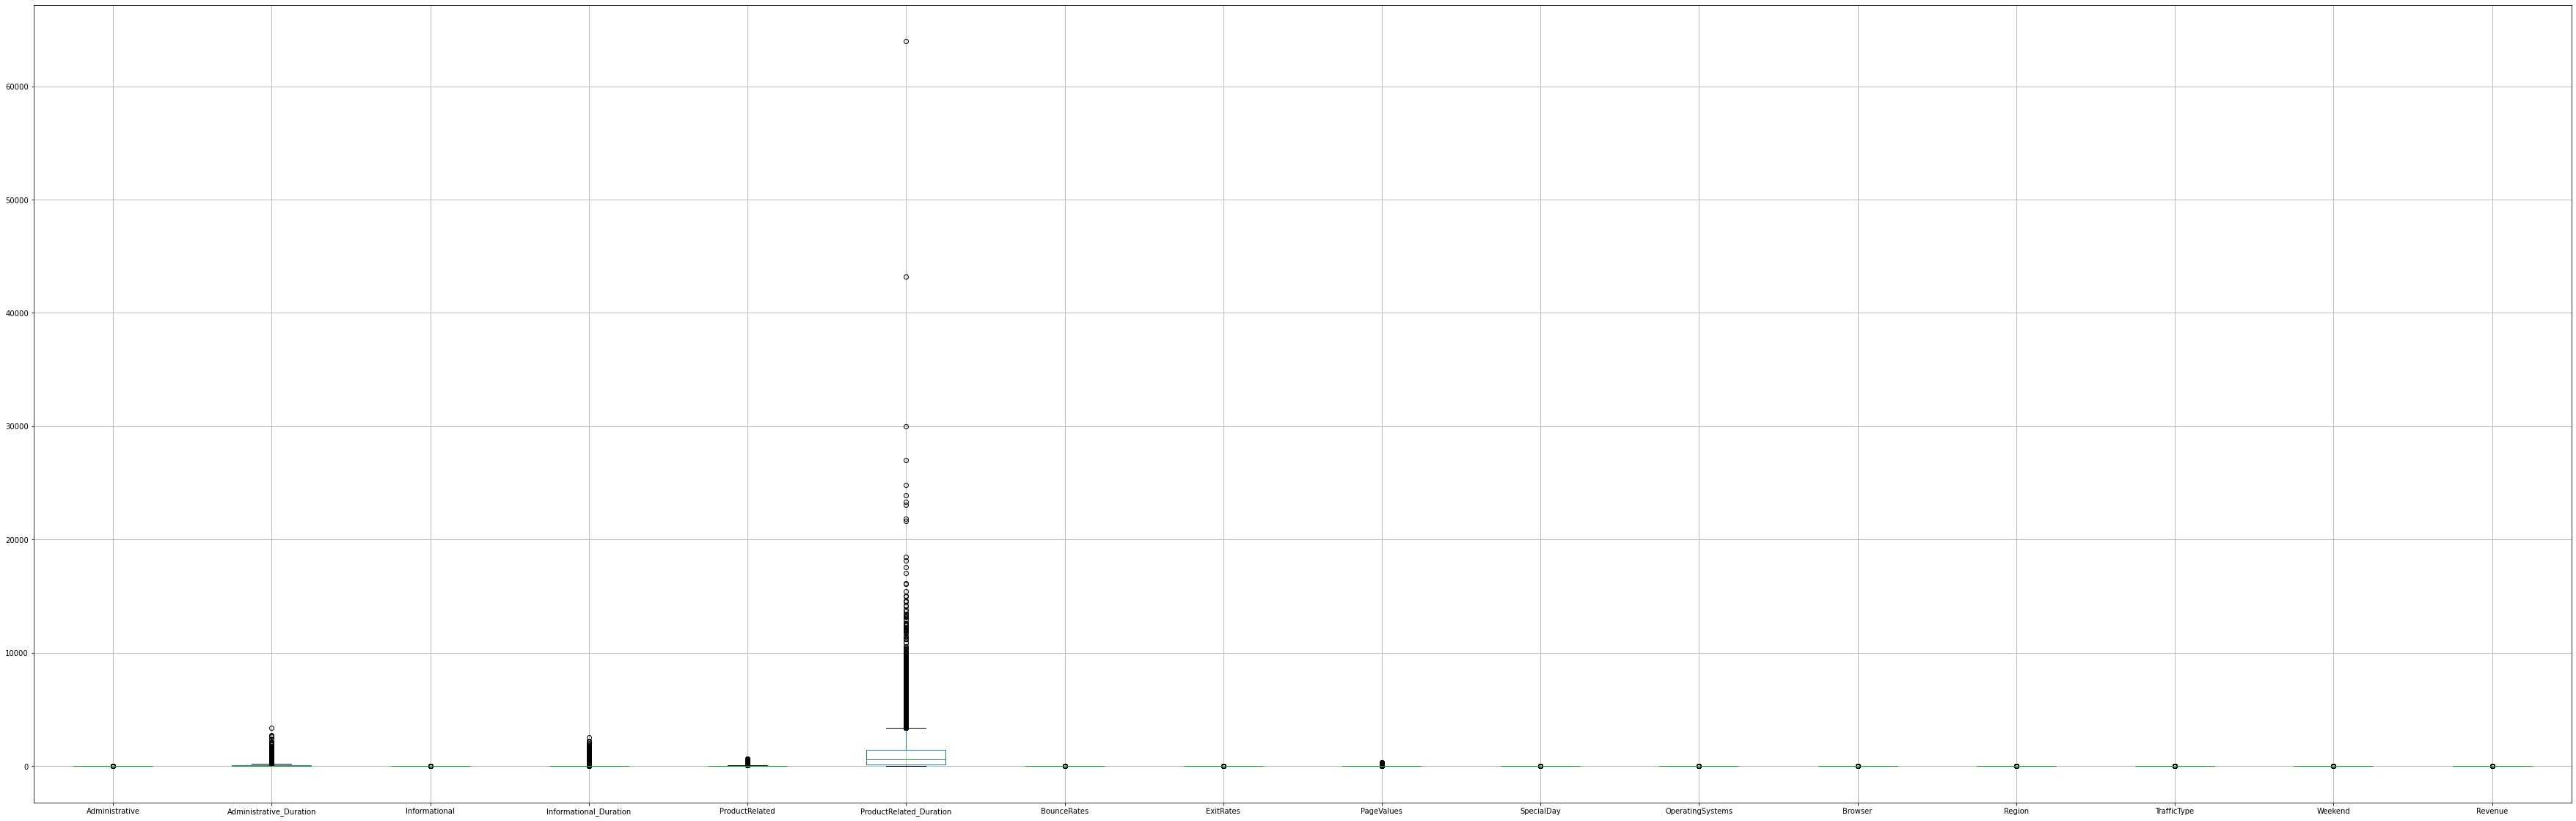

In [ ]:
plt.figure(figsize=(62, 20))
data.boxplot();

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(data[i]), std(data[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



# Visualization of Outliers

In [ ]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


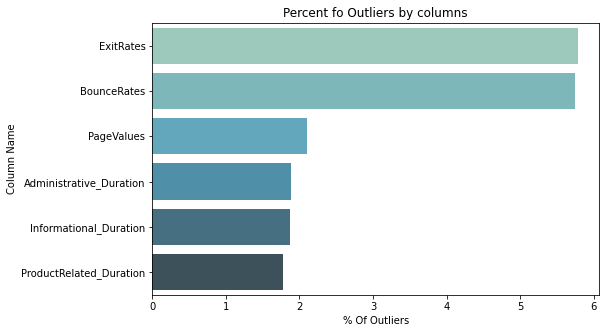

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

# Clustering Analysis
> **Trying to learn the user characteristics of in terms of time spent on the Website**
- Administrative Duration vs Bounce Rate
- Informative Duration vs Bounce Rates
- Administrative Duration vs Exit Rates

> **Where from the Users of the Website come?**
- Region vs Traffic Type
- Adminstrative Duration vs Region

**The Elbow Method to find out the maximum no. of Optimal Clusters**
- Compute clustering algorithm(e.g., K-Means Clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
- For each k, calculate the total within-cluster sum of square(WCSS).
- plot the curve of WCSS according to the number of clusters k.
- The location of a bend(Knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


In [ ]:
# Imputing Missing Values with 0
data.fillna(0, inplace = True)

#checking the no. of null values after imputing
data.isnull().sum().sum()

0

## Administrative Duration vs Bounce Rates

Shape of the dataset:  (12330, 2)


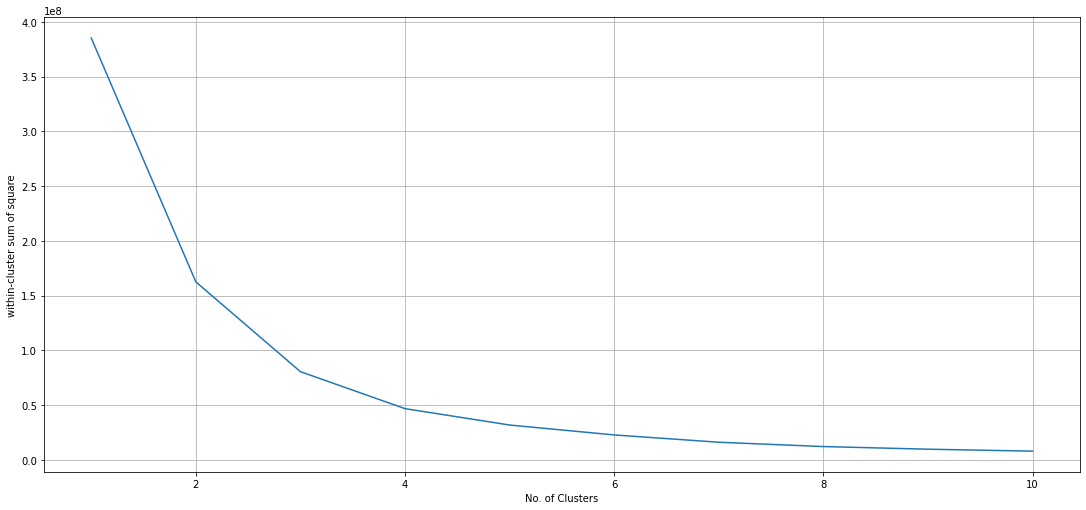

In [ ]:
# Time spent by the Users on website vs Bounce Rates
# let's cluster Administrative duration and bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

**What is the observation point here?**
- According to the above plot, the maximum bend at index 3, that is number of optimal no. of Clusters for Administrative Duration and Revenue is 3. Let's go the next step, i.e., Plotting the Clusters.


### Visualizing the Cluster using scatter plot

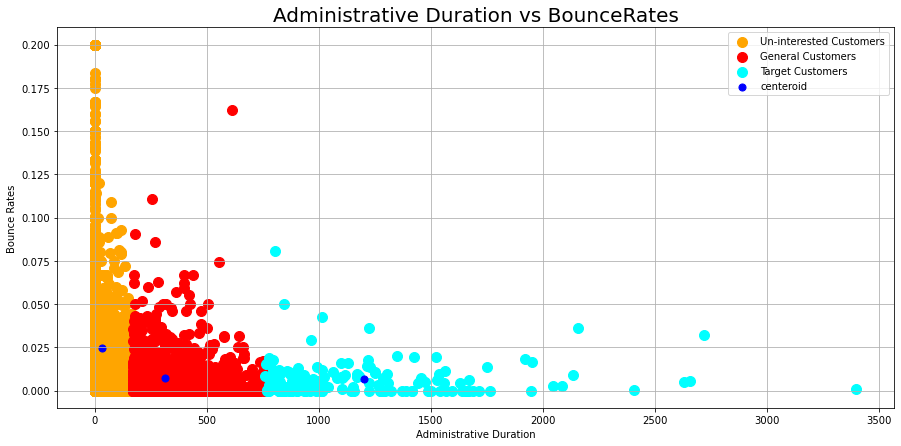

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

**What is the observation point here?**
- We see at this clustering plot, we can confidently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is nevigating away from the website just after navigating one page of that website.
- There are Three groups, The Pink group is a group of customers who stay for shortest administrative duration and have highest chance for Navigating away from a website.


## Informational Duration vs Bounce Rates

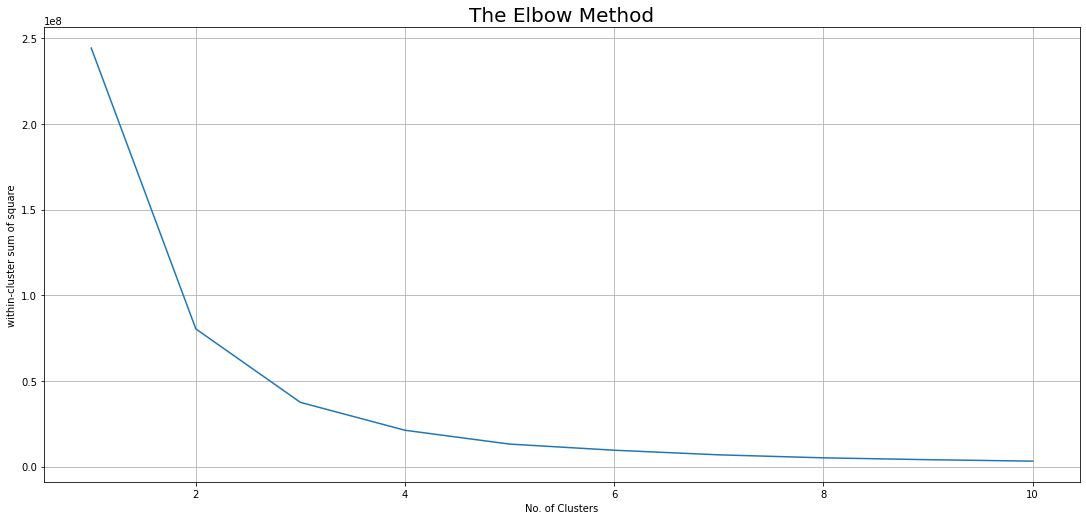

In [ ]:
# cluster anaysis of Informational Duration vs Bounce Rates
x = data.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

**What is the observation point here?**
- According to the above plot, the maximum bend at index 2, that is number of optimal no. of Clusters for Informational Duration and Revenue is 2. Let's go the next step, i.e., Plotting the Clusters.


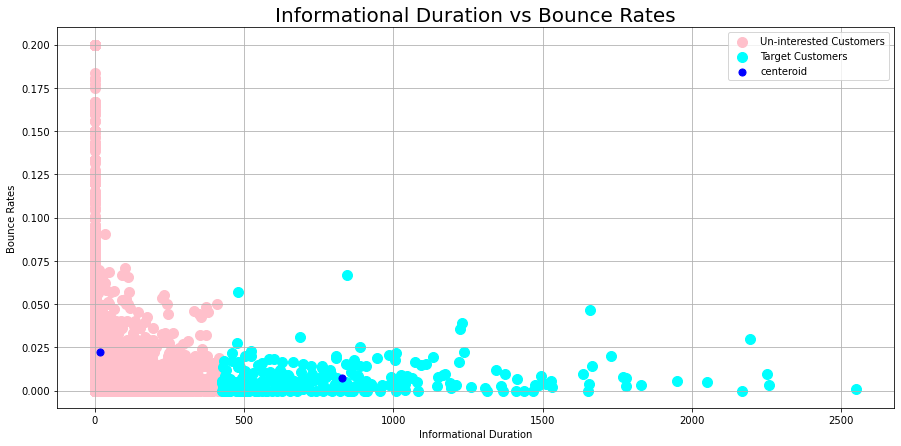

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

**What is the observation point here?**
- We see at this clustering plot, we can confidently say that the customers who spent a longer Informational duration in a website are very less likely to bounce from the website that is nevigating away from the website just after navigating one page of that website.
- There are Two groups, The Pink group is a group of customers who stay for shortest Informational duration and have highest chance for Navigating away from a website.


## Administrative Duration vs Exit Rates

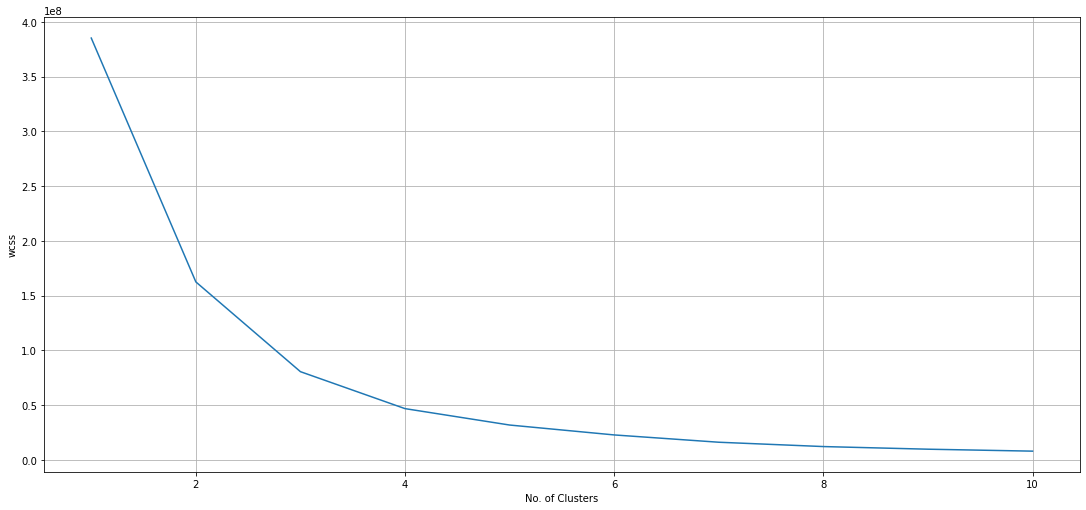

In [ ]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**What is the observation point here?**
- According to the above plot, the maximum bend at index 3, that is number of optimal no. of Clusters for Administrative Duration and Exitrates is 2. Let's go the next step, i.e., Plotting the Clusters.


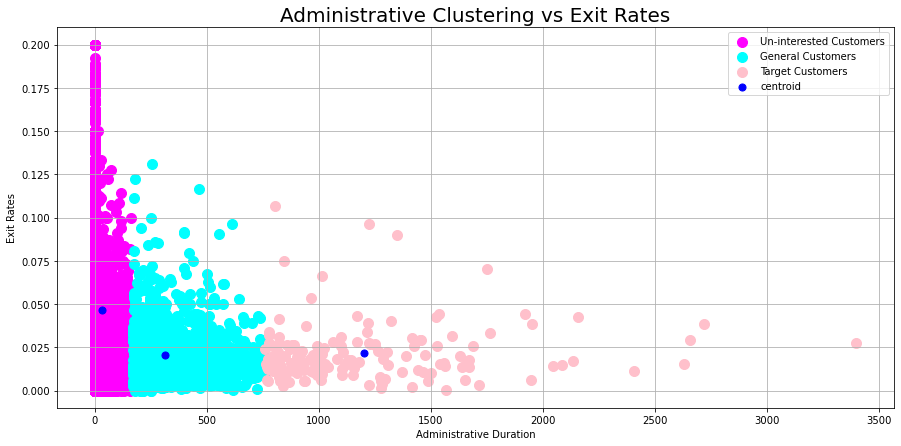

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

**What is the observation point here?**
- We see at this clustering plot, we can confidently say that the customers who spent a longer Administrative duration in a website are very less likely to Exit from the website that is nevigating away from the website.
- There are Three groups, The Magenta group is a group of customers who stay for shortest Administrative duration and have highest chance for Navigating away from a website.


## Where from the Users of the Website come?

## Region vs Traffic Type

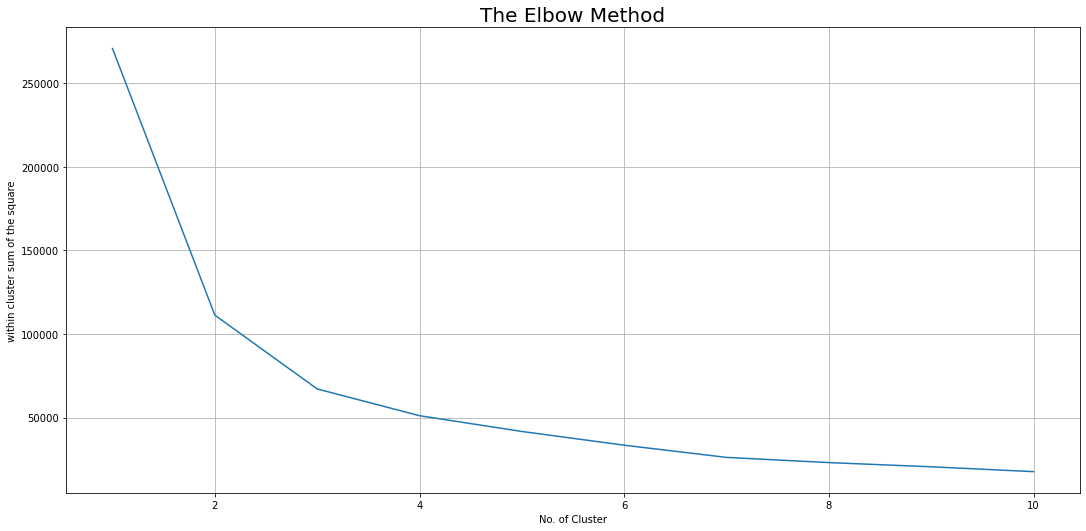

In [ ]:
# Region vs TrafficType clustering
x = data.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Cluster')
plt.ylabel('within cluster sum of the square')
plt.show()

**What is the observation point here?**
- According to the above plot, the maximum bend at index 2, that is number of optimal no. of Clusters for Region and Traffic Type is 2. Let's go the next step, i.e., Plotting the Clusters.


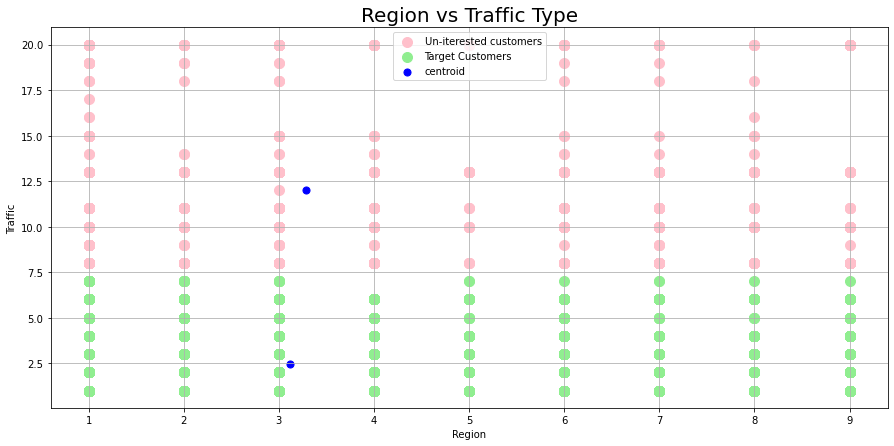

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-iterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightgreen', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.grid()
plt.show()

**What is the observation point here?**
- We see at this clustering plot, we can say that the customers who is from Region 2, 4, 5 have less traffic than others.

## Adminstrative Duration vs Region

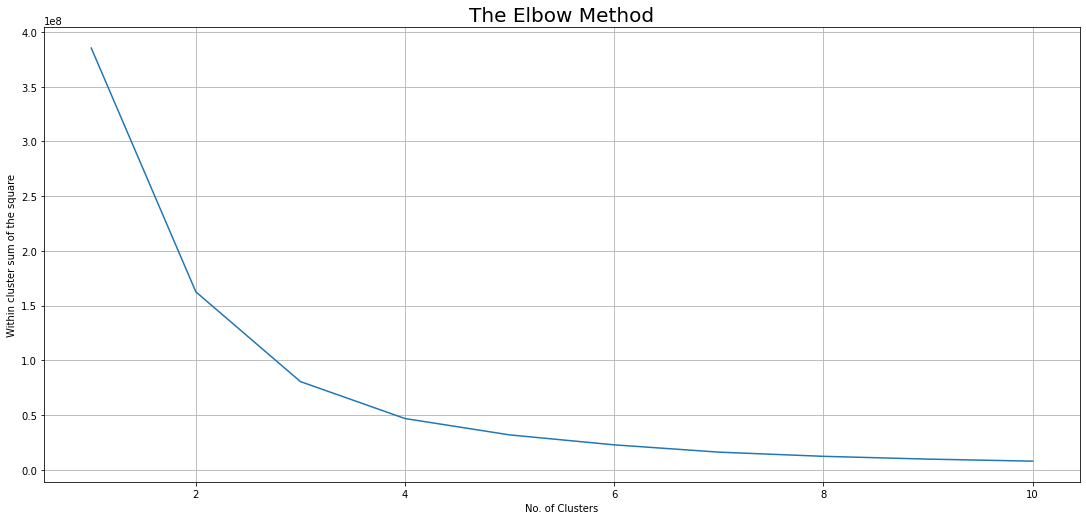

In [ ]:
# administrative duration vs bounce rates
x = data.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

**What is the observation point here?**
- According to the above plot, the maximum bend at index 2, that is number of optimal no. of Clusters for Administrative Duration and Region is 2. Let's go the next step, i.e., Plotting the Clusters.


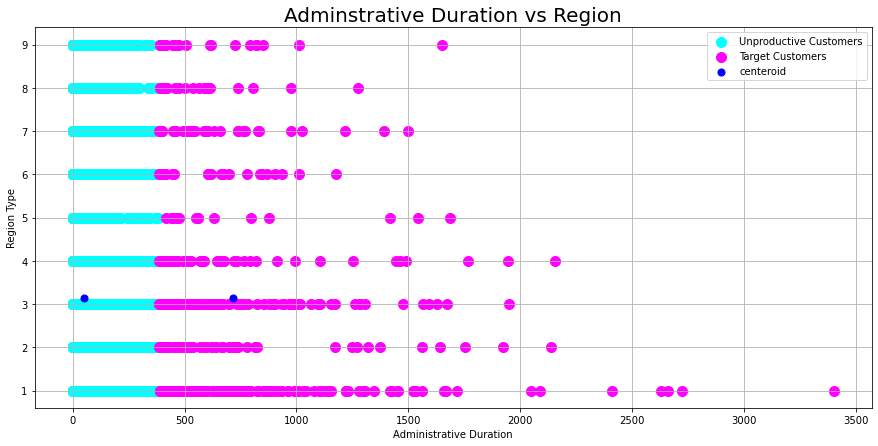

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'cyan', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

**What is the observation point here?**
- We see at this clustering plot, we can confidently say that the customers who spent a longer Administrative duration in a website are very less likely comers from 2, 4 Region Type.

# Data Preprocessing
- One Hot and Label Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# one hot encoding
df1 = pd.get_dummies(data)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
df1['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [ ]:
# Label encoding of weekend

df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [ ]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


In [ ]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


# Modelling : Support Vector Machine

In [ ]:
# model define and training
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8514801297648013
Testing Accuracy:  0.8317112733171127


The model which is just build by Support vector machine gives us training accuracy 99.5% and testing accuracy 82.85%

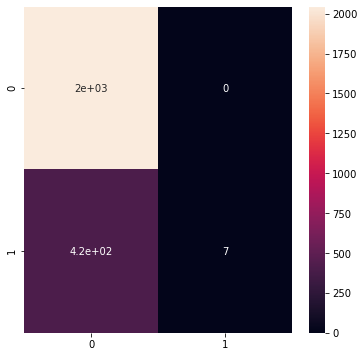

In [ ]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2044
           1       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



# Modelling: Naive Bayes

In [ ]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7982562854825629
Testing Accuracy:  0.7899432278994323


The model which is just build by Naive Bayes(Gaussian) gives us training accuracy 79.83% and testing accuracy 79.03%

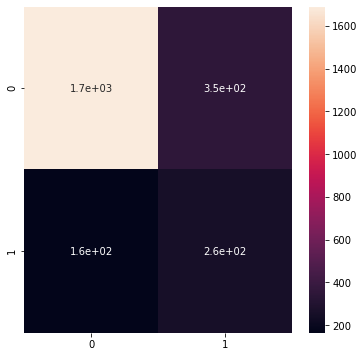

In [ ]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2044
           1       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



Above two models shows different type of accuracy. Though support vector machine gave us more accuracy I would choose naive bayes algorithm. Because, we see in the heatmap of confusion matrix that provide us important information which is support vector machine doesn't recognize any '`false-negative`'. It means support vector machine doesn't give us a any good solution. 

## Summary Table based on Two Learning Algorithm

In [ ]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
table = pd.DataFrame([precision, precision2, recall, recall2, f1_score, f1_score2])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table

,model_name,metrics,Is_Revenue(False),Is_Revenue(True)
0,Naive Bayes,precision,0.91,0.42
1,Support Vector Machine,precision,0.83,0.00
2,Naive Bayes,recall,0.83,0.61
3,Support Vector Machine,recall,1.00,0.00
4,Naive Bayes,f1_score,0.87,0.50
5,Support Vector Machine,f1_score,0.91,0.00


array([[<AxesSubplot:title={'center':'Is_Revenue(False)'}>,
        <AxesSubplot:title={'center':'Is_Revenue(True)'}>]], dtype=object)

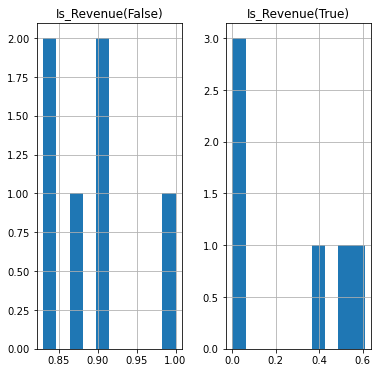

In [ ]:
table.hist()

In [35]:
data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

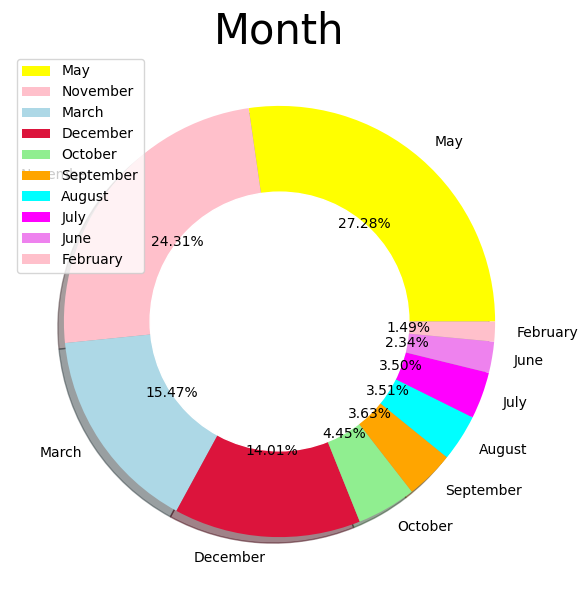

In [36]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [37]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

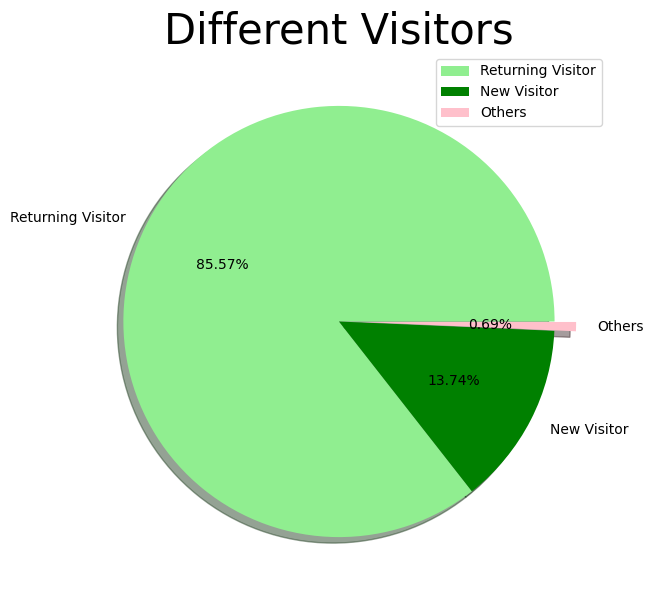

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [39]:
data['TrafficType'].value_counts()

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

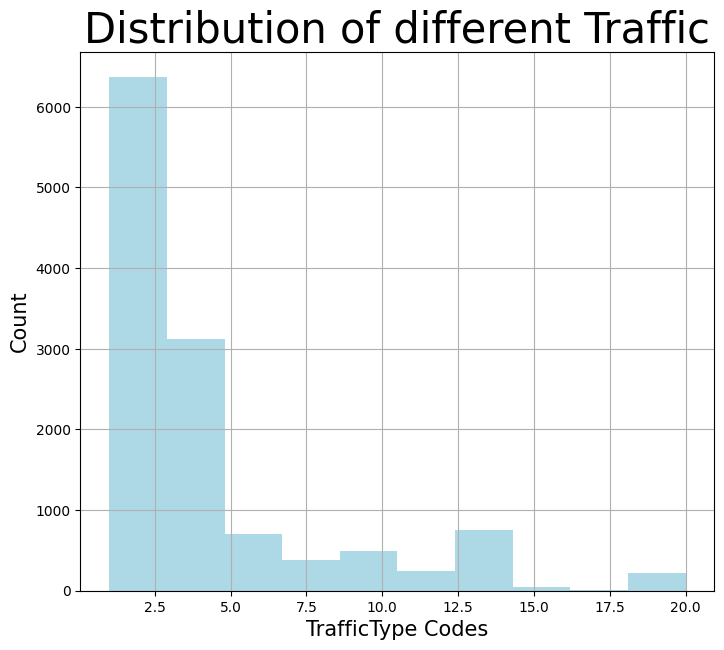

In [40]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

In [41]:
data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

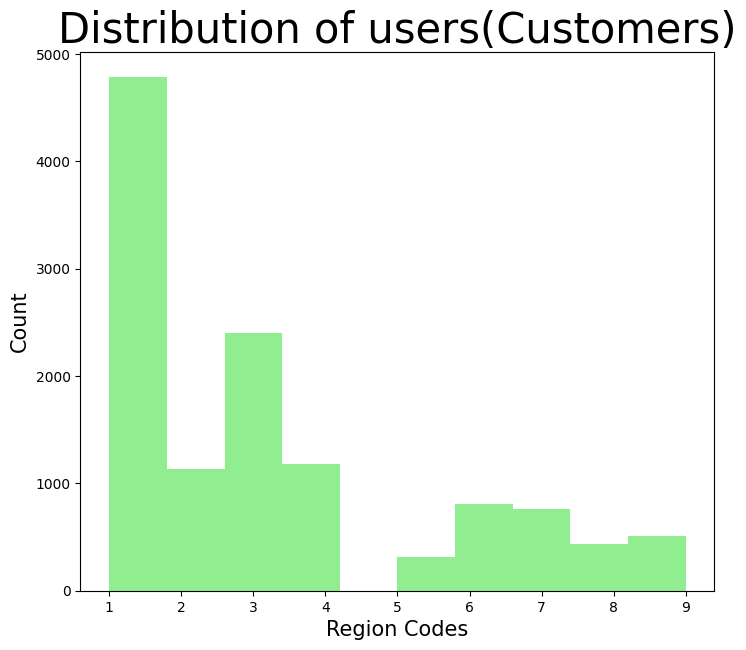

In [42]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['Region'], color = 'lightgreen')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [43]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

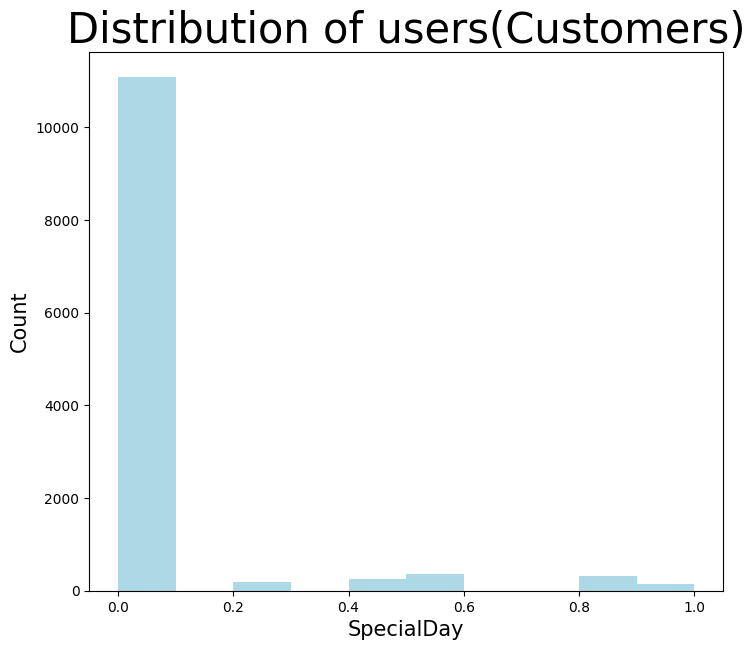

In [44]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['SpecialDay'], color = 'lightblue')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\42572125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['Administrative_Duration'], y=data['Revenue'], palette = 'pastel', orient='h')


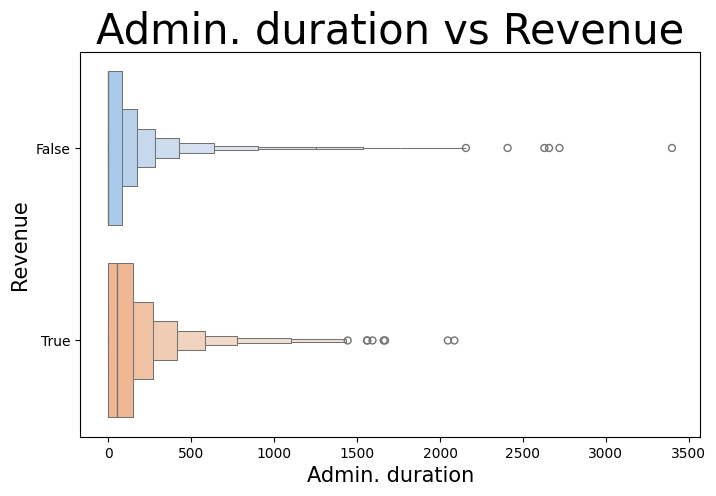

In [49]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Administrative_Duration'], y=data['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\3115386404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['Informational_Duration'], y=data['Revenue'], palette = 'rainbow', orient = 'h')


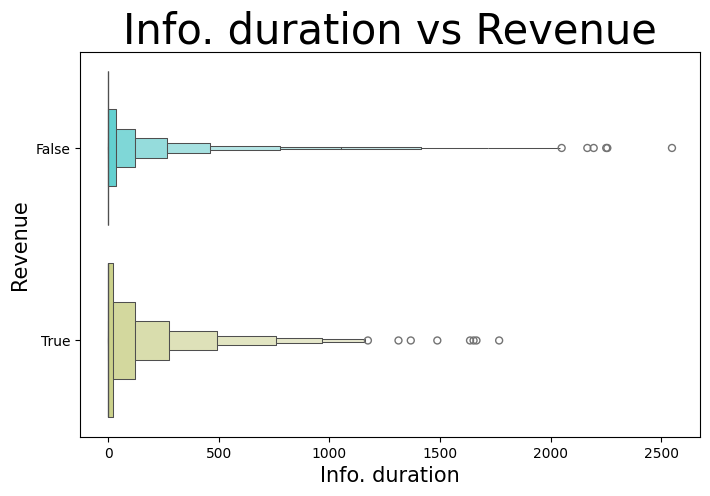

In [50]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Informational_Duration'], y=data['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\217100703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['ProductRelated_Duration'], y=data['Revenue'], palette = 'inferno', orient = 'h')


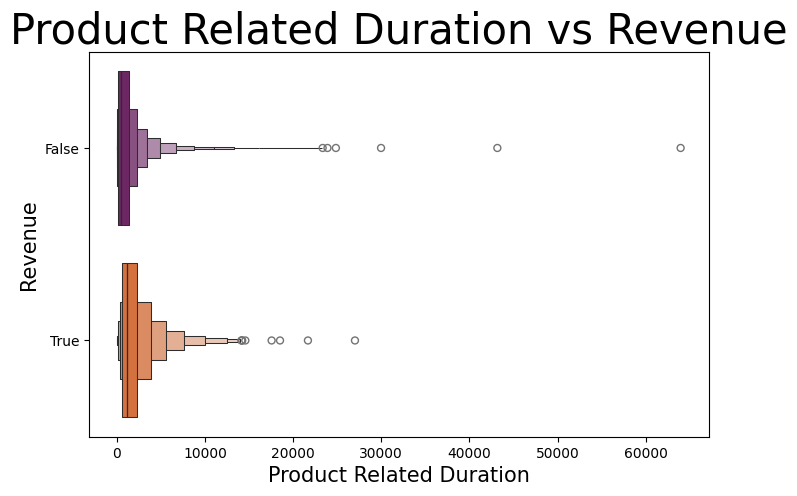

In [52]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['ProductRelated_Duration'], y=data['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()